In [ ]:
'''
CS6140 Assignment 1
Q1.2 Decision Tree using Sklearn Library

Wing Man, Kwok  
05/18/2022
'''

In [315]:
#Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier       #Import Decision Tree Classifier, to build a classification decision tree
from sklearn.model_selection import train_test_split  #Import train_test_split function
from sklearn import metrics                           #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt                  #Plot decision tree
from sklearn import tree                              #Plot decision tree
import numpy as np
% matplotlib inline

In [316]:
#Prepare dataset
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CS6140 Assignment1/data.csv")
dataset.head()

,feature1,feature2,feature3,feature4,class
0,5.0,3.5,1.3,0.3,0
1,6.9,3.1,4.9,1.5,1
2,5.8,2.6,4.0,1.2,1
3,6.7,3.0,5.2,2.3,2
4,5.1,3.3,1.7,0.5,0


In [317]:
#split dataset in features and target variable
feature_cols = dataset.columns.values[:-1]        #Equipvalent to feature_cols = ['feature1', 'feature2', 'feature3', 'feature4']
label_col = dataset.columns.values[-1] 
X = dataset[feature_cols]                         #Assign all feature columns into variable X
y = dataset[label_col]                            #Assign all target columns into variable y.  label_col = ['class']

print("Feature variables")
print("-----------------")
print(X, "\n")
print("Label")
print("-----")
print(y, "\n")
print("Feature variable shape", X.shape)

Feature variables
-----------------
     feature1  feature2  feature3  feature4
0         5.0       3.5       1.3       0.3
1         6.9       3.1       4.9       1.5
2         5.8       2.6       4.0       1.2
3         6.7       3.0       5.2       2.3
4         5.1       3.3       1.7       0.5
..        ...       ...       ...       ...
145       7.4       2.8       6.1       1.9
146       6.2       2.9       4.3       1.3
147       5.6       2.5       3.9       1.1
148       5.1       3.5       1.4       0.2
149       6.4       3.2       5.3       2.3

[150 rows x 4 columns] 

Label
-----
0      0
1      1
2      1
3      2
4      0
      ..
145    2
146    1
147    1
148    0
149    2
Name: class, Length: 150, dtype: int64 

Feature variable shape (150, 4)


In [318]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

print("Training dataset feature shape:", X_train.shape)
print("Training dataset target shape:", y_train.shape)

Training dataset feature shape: (120, 4)
Training dataset target shape: (120,)


In [319]:
# Fit training data for training, use gini as splitting measure
model = DecisionTreeClassifier(criterion="gini")
model = model.fit(X_train , y_train)
y_pred = model.predict(X_test)

print("prediction of label:\t", y_pred)
print("true label:\t\t", y_test.to_numpy())       #to_numpy() -> convert panda series into a numpy array
print("Accuracy :\t\t" , metrics.accuracy_score(y_test, y_pred))

prediction of label:	 [2 0 0 2 1 1 1 2 1 2 0 0 1 0 0 2 0 2 1 2 0 1 1 0 1 2 1 2 0 0]
true label:		 [2 0 0 2 1 1 1 2 2 2 0 0 1 0 0 2 0 2 1 2 0 1 1 0 1 2 1 2 0 0]
Accuracy :		 0.9666666666666667


In [320]:
# Print out decision tree by text
tree_text_representation = tree.export_text(model, max_depth=10, feature_names=["feature1", "feature2", "feature3", "feature4"])
print(tree_text_representation)

|--- feature3 <= 2.45
|   |--- class: 0
|--- feature3 >  2.45
|   |--- feature4 <= 1.75
|   |   |--- feature3 <= 5.05
|   |   |   |--- feature4 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature4 >  1.65
|   |   |   |   |--- feature1 <= 5.80
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature1 >  5.80
|   |   |   |   |   |--- class: 1
|   |   |--- feature3 >  5.05
|   |   |   |--- feature1 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature1 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature4 >  1.75
|   |   |--- feature3 <= 4.85
|   |   |   |--- feature1 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature1 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature3 >  4.85
|   |   |   |--- class: 2



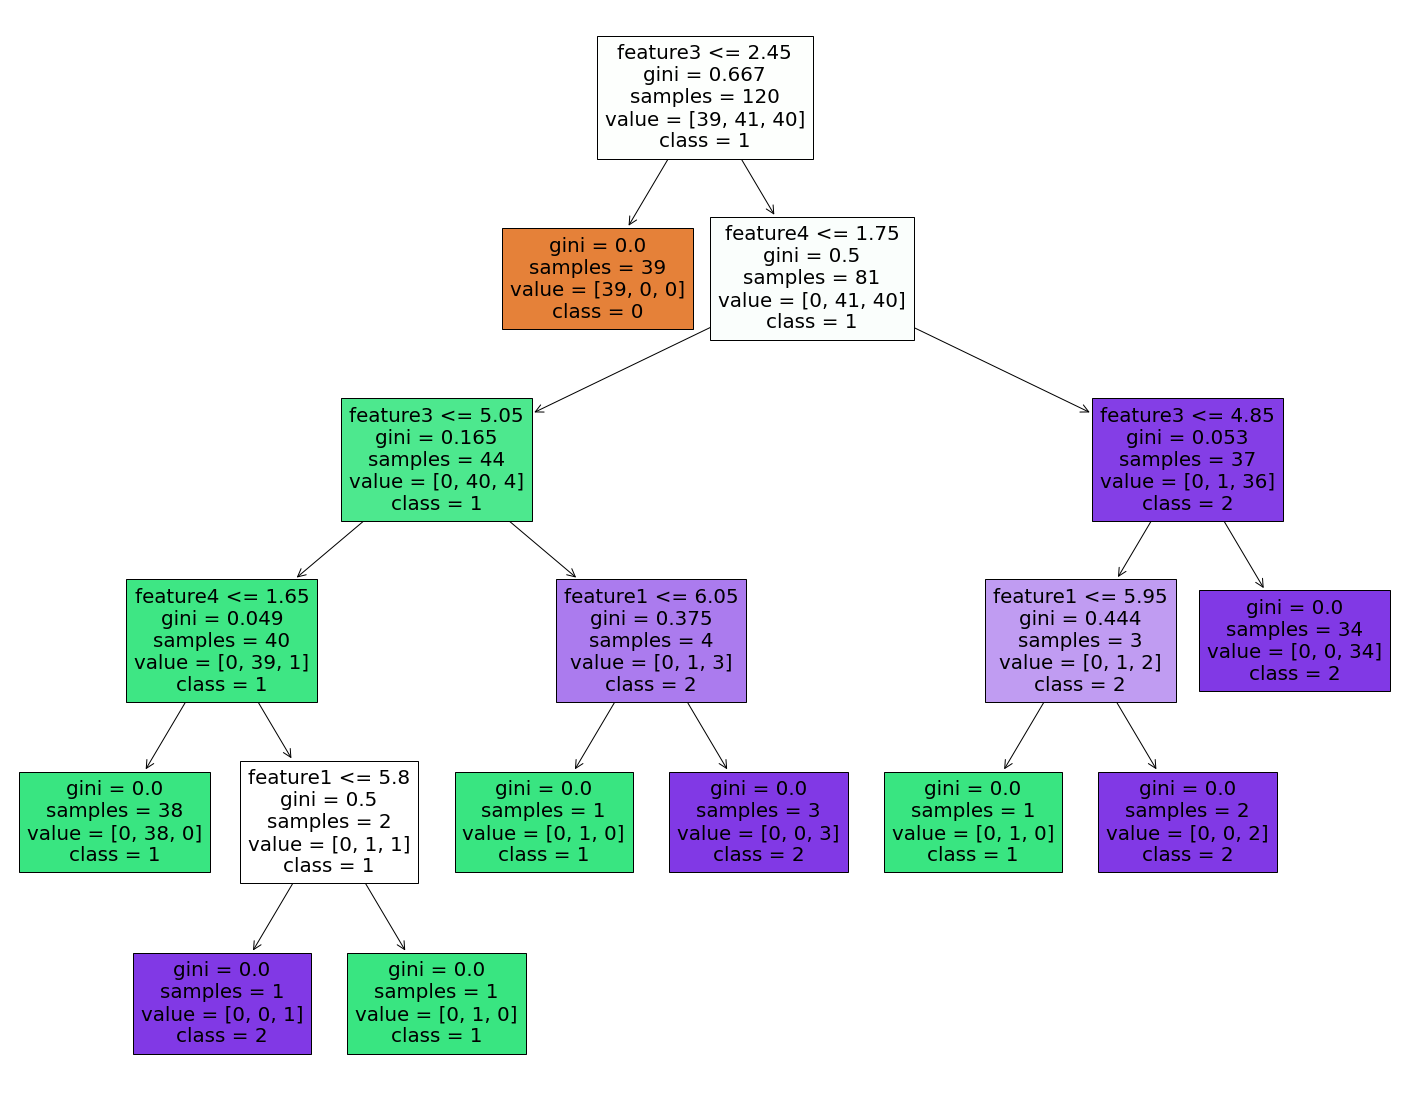

In [321]:
# Print out decision tree by plot
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
               feature_names=feature_cols, 
               class_names=["0","1","2"], 
               filled = True)
plt.show()

To compare the result with the decision tree I generated, both accuracy are satifactory.  

The tree I built using entropy as information gain to split data, the accuracy reached 90%, while using gini by this sklearn example, demonstrated a better result, with accuracy of 96.66667%.

It looks like gini can generalise prediction better, but afterall, the dataset is only 150 samples in size, so the difference could only account for this dataset only.